# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
!pip install citipy
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | te anau
Processing Record 4 of Set 1 | husavik
Processing Record 5 of Set 1 | kota kinabalu
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | andenes
Processing Record 8 of Set 1 | naze
Processing Record 9 of Set 1 | coihaique
Processing Record 10 of Set 1 | piranhas
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | mecca
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | dukhovnitskoye
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | barentu
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | tabatinga
Processing Record 21 of Set 1 | port moresby
Processing Record 22 of Set 1 | bandarbeyla
Processing Reco

Processing Record 37 of Set 4 | port elizabeth
Processing Record 38 of Set 4 | kapaa
Processing Record 39 of Set 4 | kyzyl-mazhalyk
Processing Record 40 of Set 4 | vila velha
Processing Record 41 of Set 4 | qinzhou
Processing Record 42 of Set 4 | strangnas
Processing Record 43 of Set 4 | opuwo
Processing Record 44 of Set 4 | manyoni
Processing Record 45 of Set 4 | ilulissat
Processing Record 46 of Set 4 | skelleftea
Processing Record 47 of Set 4 | kaitangata
Processing Record 48 of Set 4 | kropotkin
Processing Record 49 of Set 4 | fevralsk
City not found. Skipping...
Processing Record 0 of Set 5 | eyl
Processing Record 1 of Set 5 | beloha
Processing Record 2 of Set 5 | kamenskoye
City not found. Skipping...
Processing Record 3 of Set 5 | ponta do sol
Processing Record 4 of Set 5 | talnakh
Processing Record 5 of Set 5 | maniitsoq
Processing Record 6 of Set 5 | atar
Processing Record 7 of Set 5 | cedar city
Processing Record 8 of Set 5 | chicama
Processing Record 9 of Set 5 | pisco
Proce

City not found. Skipping...
Processing Record 30 of Set 8 | luganville
Processing Record 31 of Set 8 | beipiao
Processing Record 32 of Set 8 | nyirlugos
Processing Record 33 of Set 8 | suining
Processing Record 34 of Set 8 | zhicheng
Processing Record 35 of Set 8 | polignano a mare
Processing Record 36 of Set 8 | puerto lempira
Processing Record 37 of Set 8 | oyem
Processing Record 38 of Set 8 | meyungs
City not found. Skipping...
Processing Record 39 of Set 8 | san policarpo
Processing Record 40 of Set 8 | turayf
Processing Record 41 of Set 8 | killybegs
Processing Record 42 of Set 8 | iwaki
Processing Record 43 of Set 8 | kamenka
Processing Record 44 of Set 8 | priiskovyy
Processing Record 45 of Set 8 | madang
Processing Record 46 of Set 8 | aranos
Processing Record 47 of Set 8 | muroto
Processing Record 48 of Set 8 | clyde river
Processing Record 49 of Set 8 | yichang
Processing Record 0 of Set 9 | bubaque
Processing Record 1 of Set 9 | pavilosta
Processing Record 2 of Set 9 | foam 

City not found. Skipping...
Processing Record 15 of Set 12 | tottori
Processing Record 16 of Set 12 | emba
Processing Record 17 of Set 12 | fasa
Processing Record 18 of Set 12 | lorengau
Processing Record 19 of Set 12 | armizonskoye
Processing Record 20 of Set 12 | parsabad
Processing Record 21 of Set 12 | benjamin aceval
Processing Record 22 of Set 12 | rey bouba
Processing Record 23 of Set 12 | ibotirama
Processing Record 24 of Set 12 | lovozero
Processing Record 25 of Set 12 | kaputa
Processing Record 26 of Set 12 | laguna
Processing Record 27 of Set 12 | griffith
Processing Record 28 of Set 12 | bururi
Processing Record 29 of Set 12 | palmerston
Processing Record 30 of Set 12 | karasjok
Processing Record 31 of Set 12 | biak
Processing Record 32 of Set 12 | hasaki
Processing Record 33 of Set 12 | vikhorevka
Processing Record 34 of Set 12 | rumoi
Processing Record 35 of Set 12 | yerbogachen
Processing Record 36 of Set 12 | qaqortoq
Processing Record 37 of Set 12 | nicolas bravo
Proce

In [9]:

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,georgetown,5.4112,100.3354,24.97,88,20,0.00,MY,1680555818
1,rikitea,-23.1203,-134.9692,26.53,81,90,6.33,PF,1680555819
2,te anau,-45.4167,167.7167,11.21,82,19,0.05,NZ,1680555820
3,husavik,66.0449,-17.3389,3.29,94,100,4.33,IS,1680555821
4,kota kinabalu,5.9749,116.0724,24.99,88,20,2.24,MY,1680555821


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,georgetown,5.4112,100.3354,24.97,88,20,0.00,MY,1680555818
1,rikitea,-23.1203,-134.9692,26.53,81,90,6.33,PF,1680555819
2,te anau,-45.4167,167.7167,11.21,82,19,0.05,NZ,1680555820
3,husavik,66.0449,-17.3389,3.29,94,100,4.33,IS,1680555821
4,kota kinabalu,5.9749,116.0724,24.99,88,20,2.24,MY,1680555821


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

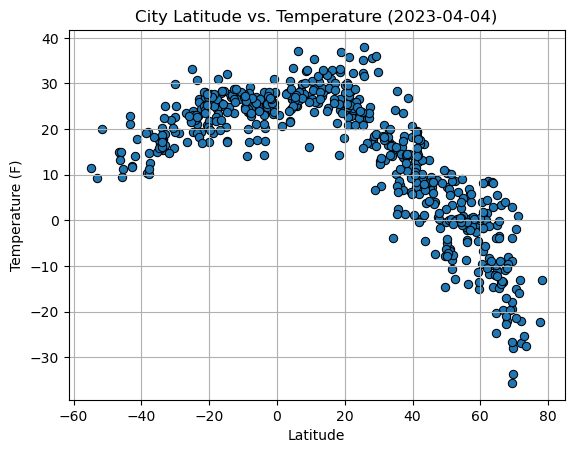

In [28]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidth = .75)
# Incorporate the other graph properties
# YOUR CODE HERE
#plt.title("City Latitude vs Max Temperature (2022-10-18)/(2023-03-29)")
plt.title(f"City Latitude vs. Temperature ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

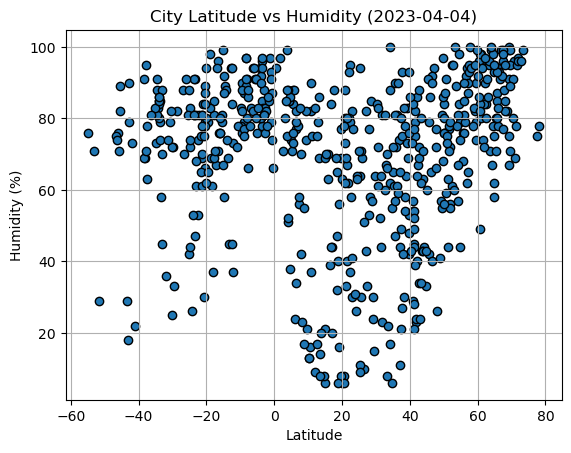

In [29]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")
#, linewidth = .75
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Latitude vs Humidity ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

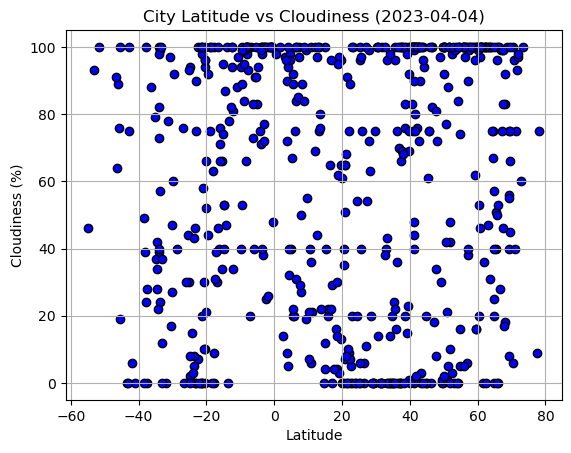

In [30]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", color="blue")
#linewidth = .75,
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Latitude vs Cloudiness ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

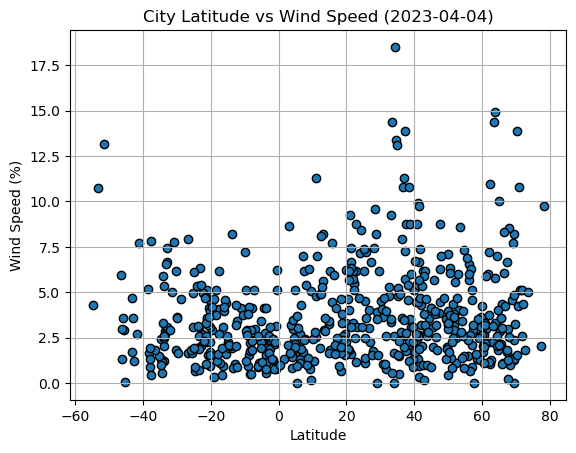

In [31]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Latitude vs Wind Speed ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots

# def linRegressPlot(xvalues, xlabel, yvalues, ylabel, eq_coords):
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
#     print(f"The r-value is: {rvalue}")
#     regress_values = xvalues * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
#     plt.scatter(xvalues, yvalues)
#     plt.plot(xvalues, regress_values, 'r-')
#     plt.annotate(line_eq, (eq_coords[0], eq_coords[1]), fontsize=12, color='red')
    
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"]>= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,georgetown,5.4112,100.3354,24.97,88,20,0.00,MY,1680555818
3,husavik,66.0449,-17.3389,3.29,94,100,4.33,IS,1680555821
4,kota kinabalu,5.9749,116.0724,24.99,88,20,2.24,MY,1680555821
6,andenes,69.3143,16.1194,2.99,75,75,8.23,NO,1680555822
7,naze,28.3667,129.4833,17.51,58,63,9.58,JP,1680555823


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"]< 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rikitea,-23.1203,-134.9692,26.53,81,90,6.33,PF,1680555819
2,te anau,-45.4167,167.7167,11.21,82,19,0.05,NZ,1680555820
5,lebu,-37.6167,-73.6500,14.68,63,0,7.85,CL,1680555822
8,coihaique,-45.5752,-72.0662,9.48,89,100,2.91,CL,1680555823
9,piranhas,-16.4269,-51.8222,25.80,76,40,0.95,BR,1680555821


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.889


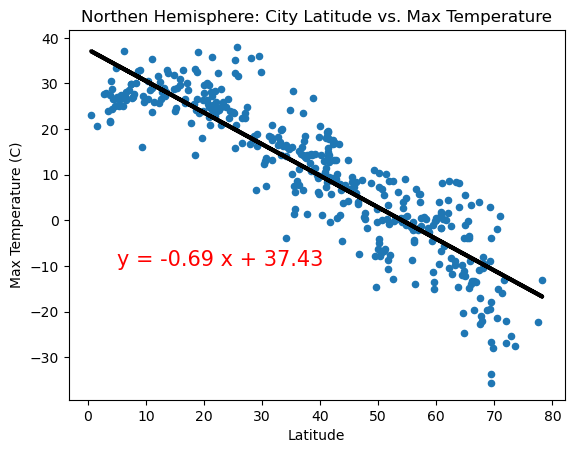

In [38]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
linear_regression = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
linear_equation = linear_regression[0] * northern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
northern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Max Temp',)

plt.plot(
    northern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Northen Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.annotate(line_eq, (5,-10), fontsize=15,color="red")
plt.show()

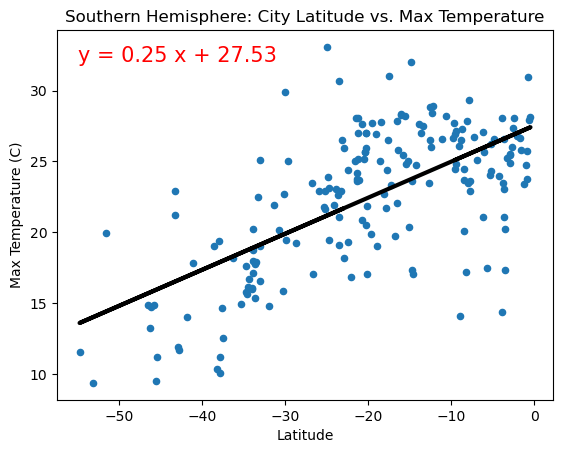

The r-squared is: 0.651


In [40]:
# Linear regression on Southern Hemisphere
linear_regression = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
linear_equation = linear_regression[0] * southern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

southern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Max Temp',)
    

plt.plot(
    southern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Southern Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.annotate(line_eq, (-55,32), fontsize=15,color="red")
plt.show()
print(f'The r-squared is: {round(linear_regression[2],3)}')

**Discussion about the linear relationship:** There is a linear correlation between Latitude and Max Temperature and this is evident when the city data is separated between the two variables. There is a strong negative correlation in the northern hemisphere and a positive correlation in that of the Southern hemisphere. This result and correlation was to be expected given the relation between increased temperatures and proximity to the equator. In regards to the Northern Hemisphere, an increase in latitude generally indicates a greater distance from tthe equator, and thus lower maximum temperatures. Whereas in the southern hemisphere an increase in latitude results in higher maximum temperatures because of the lessening distance to the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.412


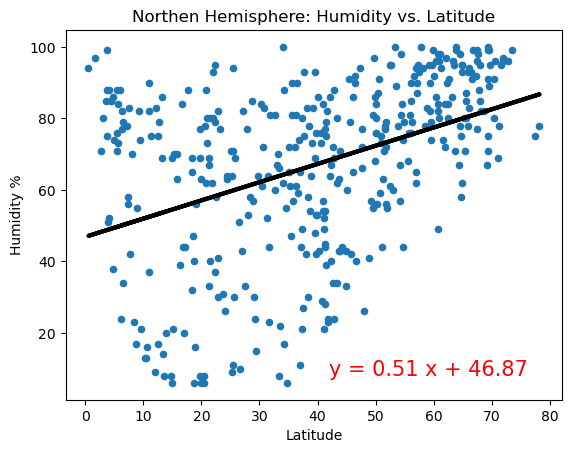

In [42]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regression = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"].astype('float'))
linear_equation = linear_regression[0] * northern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
northern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Humidity',)

plt.plot(
    northern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Northen Hemisphere: Humidity vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.annotate(line_eq, (42,8), fontsize=15,color="red")
plt.show()

The r-squared is: 0.317


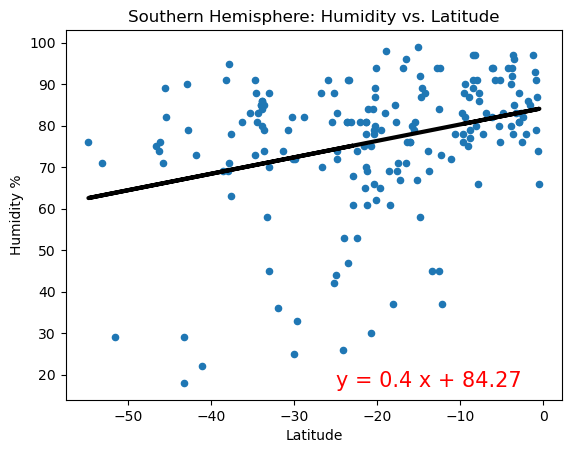

In [44]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regression = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'].astype('float'))
linear_equation = linear_regression[0] * southern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
southern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Humidity',)

plt.plot(
    southern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Southern Hemisphere: Humidity vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.annotate(line_eq, (-25,17), fontsize=15,color="red")
plt.show()


**Discussion about the linear relationship:** The relationship between humidity and latitude is positive in both hemispheres, this correlation is weaker than that of latitude and max tempereature, but still slightly positive. This would suggest that generally, the higher the latitute, the higher the humidity percentage. However, this is possibly subject to change based on season, especially in the northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.155


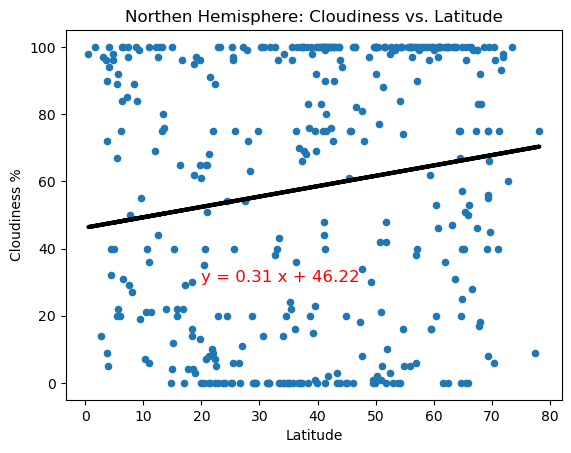

In [50]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regression = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'].astype('float'))
linear_equation = linear_regression[0] * northern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
northern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Cloudiness',)

plt.plot(
    northern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Northen Hemisphere: Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.annotate(line_eq, (20, 30), fontsize=12,color="red")
plt.show()

The r-squared is: 0.333


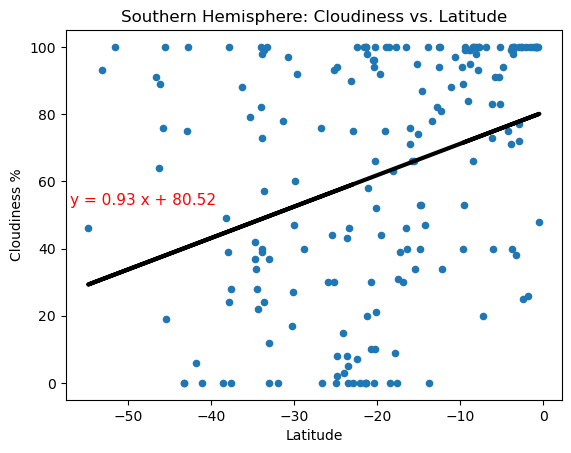

In [54]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regression = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'].astype('float'))
linear_equation = linear_regression[0] * southern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
southern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Cloudiness',)

plt.plot(
    southern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Southern Hemisphere: Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.annotate(line_eq, (-57,53), fontsize=11,color="red")
plt.show()

**Discussion about the linear relationship:** Similar to the relationship between latitude and humidity, the correlation between cloudiness and latitude is also positive, it is also much weaker than that between latitude and max temperature. The correlation between cloudiness and latitude in the northern hemisphere is only slighlty positive. No strong conclusions can be drawn using the plots regarding the relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.035


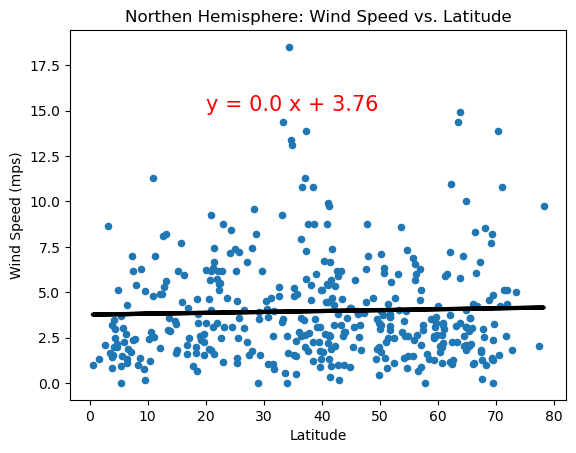

In [32]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regression = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'].astype('float'))
linear_equation = linear_regression[0] * northern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
northern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Wind Speed',)
plt.plot(
    northern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')
plt.title('Northen Hemisphere: Wind Speed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mps)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.show()


The r-squared is: -0.265


Text(-25, 12, 'y = -0.04 x + 2.18')

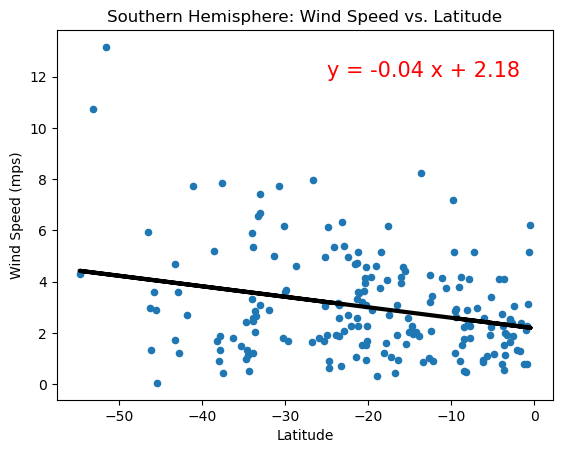

In [57]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regression = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'].astype('float'))
linear_equation = linear_regression[0] * southern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
southern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Wind Speed',)
plt.plot(
    southern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')
plt.title('Southern Hemisphere: Wind Speed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mps)')
plt.annotate(line_eq,(-25,12),fontsize=15,color="red")

**Discussion about the linear relationship:** The relationship between wind speed and latitude asseen in the above plots, is very interesting especially since in the northern hemisphere there appears to be a correlaation so minimal it seems insignificant. The correlation between. wind speed and latitude in the southern hemisphere, on the other hand is a weak negative one. Out of all the plots and correlations, and in comparison to them, the relationship between wind speed and latitude were the most trivial, in both hemispheres.